<a href="https://colab.research.google.com/github/crystal-zhu/Sitcom_Success_Factors-CSDS_312/blob/main/SSF_B99_Summaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set Up


In [ ]:
# import
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Dataset

In [ ]:
with open("/content/drive/Shareddrives/CSDS 312 Final Project/b99_data/B99_Reviews/brooklyn99_episodes.csv") as d:
  ep_data = pd.read_csv(d)

with open("/content/drive/Shareddrives/CSDS 312 Final Project/b99_data/B99_Reviews/brooklyn99_imdb.csv") as e:
  imdb_data = pd.read_csv(e)


In [ ]:
ep_data.head()

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Phil Lord & Christopher Miller,Dan Goor & Michael Schur,2013-09-17,101.0,6170000.0
1,1,2,2,The Tagger,Craig Zisk,Norm Hiscock,2013-09-24,102.0,4030000.0
2,1,3,3,The Slump,Julie Anne Robinson,Prentice Penny,2013-10-01,105.0,3430000.0
3,1,4,4,M.E. Time,Troy Miller,Gil Ozeri,2013-10-08,106.0,3340000.0
4,1,5,5,The Vulture,Jason Ensler,Laura McCreary,2013-10-15,104.0,3430000.0


In [ ]:
imdb_data.head()

,season,episode_num,title,original_air_date,imdb_rating,total_votes,desc
0,1,1,Pilot,17 Sep. 2013,7.8,4678,Detective Jake Peralta finds his work scrutini...
1,1,2,The Tagger,24 Sep. 2013,7.5,3818,"When Jake arrives late for work, Captain Holt ..."
2,1,3,The Slump,1 Oct. 2013,7.6,3576,"With a backlog of unsolved cases, Jake finds h..."
3,1,4,M.E. Time,8 Oct. 2013,7.7,3458,"Jake meets an attractive Medical Examiner, but..."
4,1,5,The Vulture,15 Oct. 2013,8.0,3353,A detective from Major Crimes takes over Jake'...


# US Views per Episode of B99

In [ ]:
ep_data['us_viewers'] = pd.to_numeric(ep_data['us_viewers'], errors = 'coerce')
ep_data['us_viewers'] = ep_data['us_viewers']/1000000


Text(50.722222222222214, 0.5, 'Season')

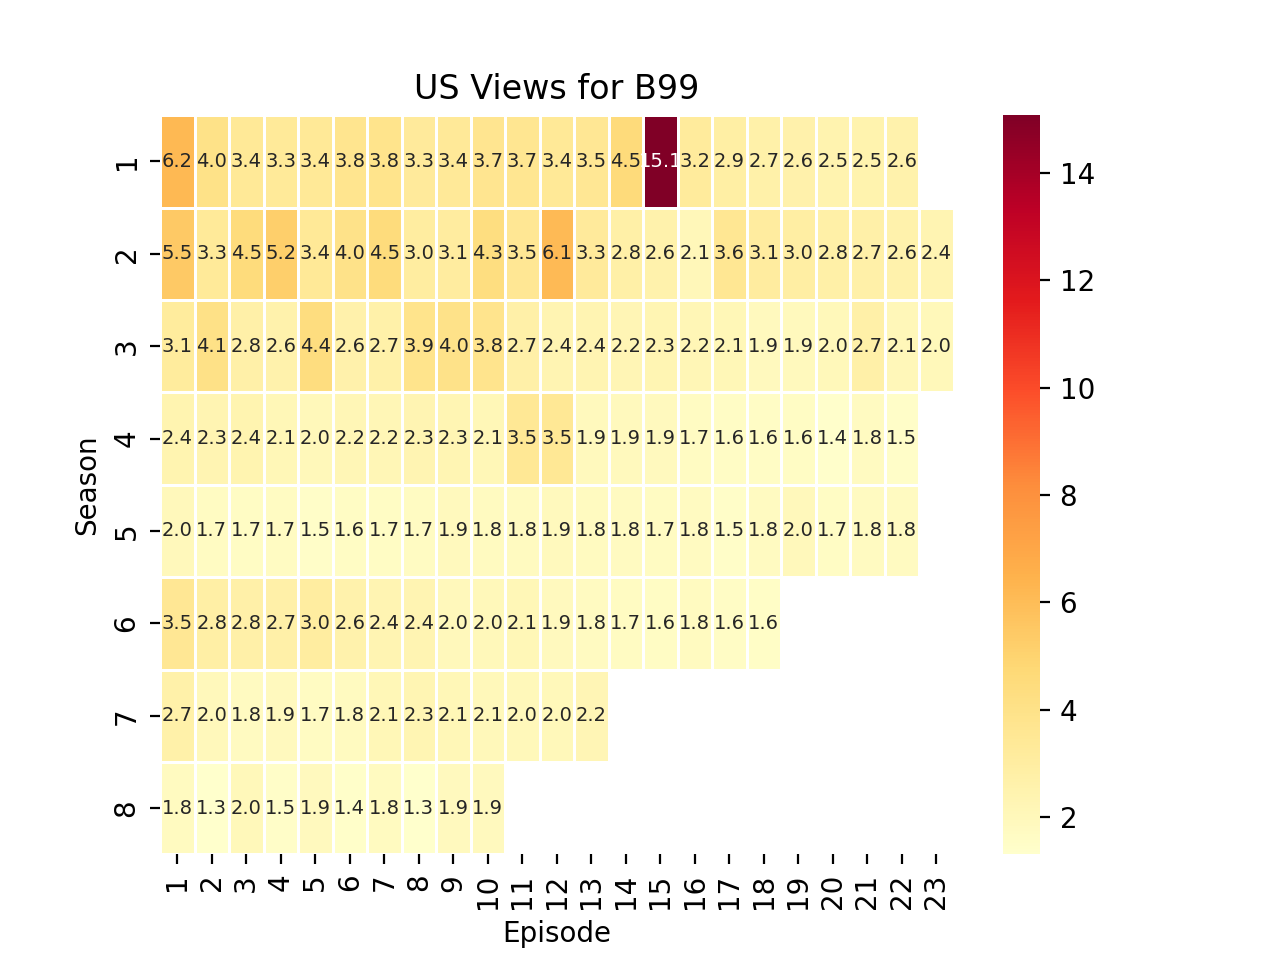

In [ ]:
custom = LinearSegmentedColormap.from_list('YR', [(1, 1, 0), (1, 0, 0)])

views_heatmap = ep_data.pivot_table(index='season', columns='episode_num_in_season', values='us_viewers', aggfunc='mean')
views = sns.heatmap(views_heatmap, fmt=".1f", cmap="YlOrRd", linewidths=0.5, annot = True, annot_kws={"size": 7})
views.set_title("US Views for B99")
views.set_xlabel("Episode")
views.set_ylabel("Season")

### Most Viewed Episodes

In [ ]:
top_10_viewed = ep_data.nlargest(10, 'us_viewers')
print(top_10_viewed[['season', 'episode_num_in_season', 'title', 'us_viewers']])

    season  episode_num_in_season                       title  us_viewers
14       1                     15   Operation: Broken Feather       15.07
0        1                      1                       Pilot        6.17
33       2                     12                 Beach House        6.12
22       2                      1                  Undercover        5.46
25       2                      4                Halloween II        5.22
13       1                     14            The Ebony Falcon        4.55
28       2                      7                    Lockdown        4.53
24       2                      3         The Jimmy Jab Games        4.51
49       3                      5               Halloween III        4.38
31       2                     10  The Pontiac Bandit Returns        4.32


### Least Viewed Episodes


In [ ]:
top_10_least_viewed = ep_data.nsmallest(10, 'us_viewers')
print(top_10_least_viewed[['season', 'episode_num_in_season', 'title', 'us_viewers']])

     season  episode_num_in_season               title  us_viewers
150       8                      8             Renewal        1.31
144       8                      2      The Lake House        1.34
87        4                     20  The Slaughterhouse        1.38
148       8                      6          The Set Up        1.45
106       5                     17                 DFW        1.48
146       8                      4           Balancing        1.49
89        4                     22  Crime & Punishment        1.50
94        5                      5            Bad Beat        1.50
129       6                     18       Suicide Squad        1.55
84        4                     17             Cop-Con        1.61


# IMDB Ratings for B99

Text(50.722222222222214, 0.5, 'Season')

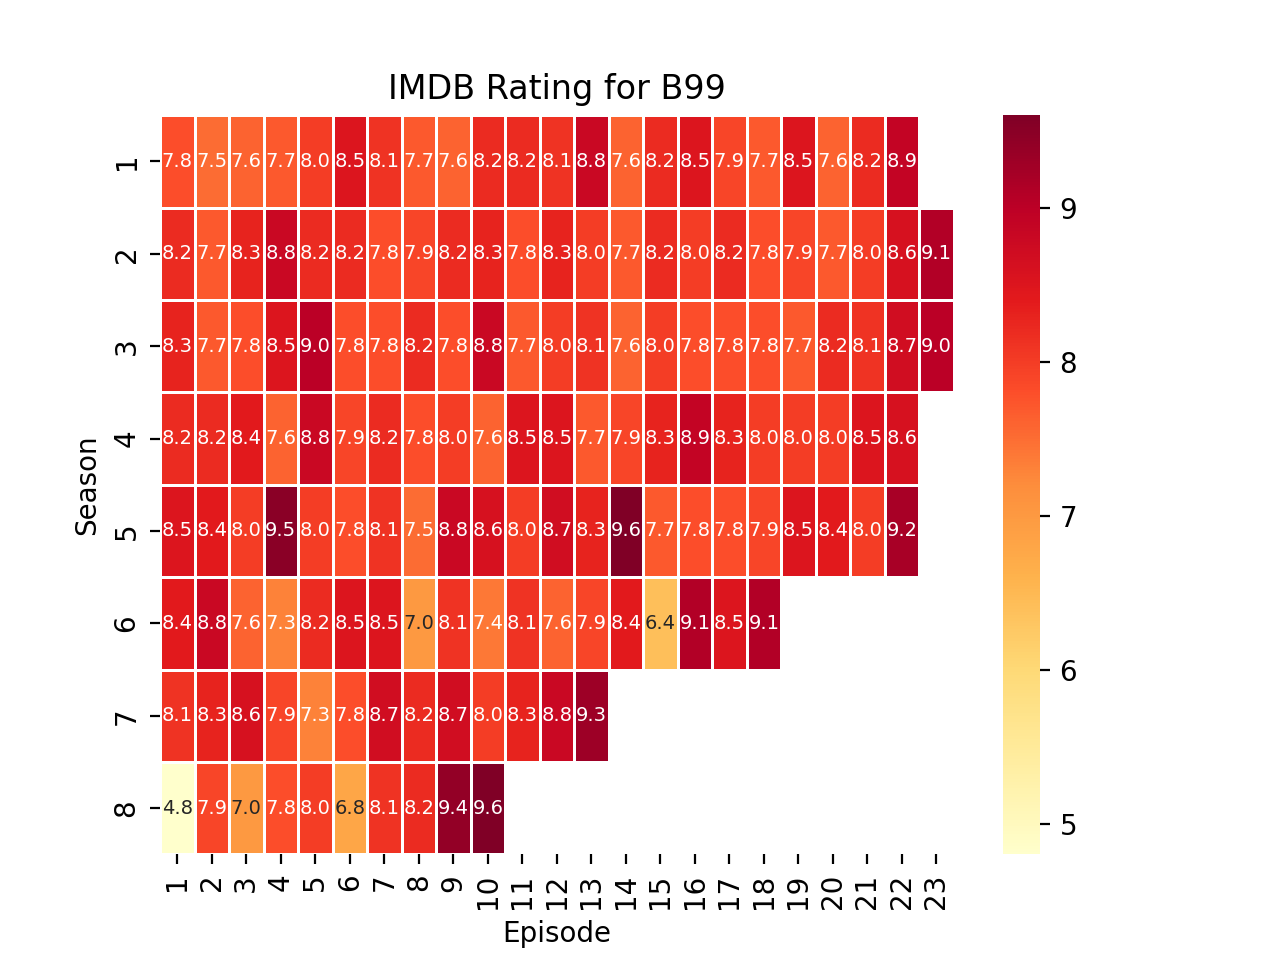

In [ ]:
imdb_data['imdb_rating'] = pd.to_numeric(imdb_data['imdb_rating'], errors = 'coerce')

imdb_heatmap = imdb_data.pivot_table(index='season', columns='episode_num', values='imdb_rating', aggfunc='mean')
imdb = sns.heatmap(imdb_heatmap, fmt=".1f", cmap="YlOrRd", linewidths=0.5, annot = True, annot_kws={"size": 7})

imdb.set_title("IMDB Rating for B99")
imdb.set_xlabel("Episode")
imdb.set_ylabel("Season")

### Highest Rated


In [ ]:
top_10_rated = imdb_data.nlargest(10, 'imdb_rating')
print(top_10_rated[['season', 'episode_num', 'title', 'imdb_rating']])

     season  episode_num              title  imdb_rating
103       5           14            The Box          9.6
152       8           10  The Last Day Pt 2          9.6
93        5            4          HalloVeen          9.5
151       8            9  The Last Day Pt 1          9.4
142       7           13         Lights Out          9.3
111       5           22         Jake & Amy          9.2
44        2           23    Johnny and Dora          9.1
127       6           16      Cinco de Mayo          9.1
129       6           18      Suicide Squad          9.1
49        3            5      Halloween III          9.0


### Lowest Rated

In [ ]:
top_10_lowest_rated = imdb_data.nsmallest(10, 'imdb_rating')
print(top_10_lowest_rated[['season', 'episode_num', 'title', 'imdb_rating']])

     season  episode_num               title  imdb_rating
143       8            1       The Good Ones          4.8
126       6           15  Return of the King          6.4
148       8            6          The Set Up          6.8
119       6            8   He Said, She Said          7.0
145       8            3            Blue Flu          7.0
115       6            4      Four Movements          7.3
134       7            5              Debbie          7.3
121       6           10             Gintars          7.4
1         1            2          The Tagger          7.5
97        5            8   Return to Skyfire          7.5


### Rating to Number of Ratings Ratio

(shows possible bias in ratings. The higher the rating, the more weighted each rating is and the higher likelyhood of an unfair rating)

Text(50.722222222222214, 0.5, 'Season')

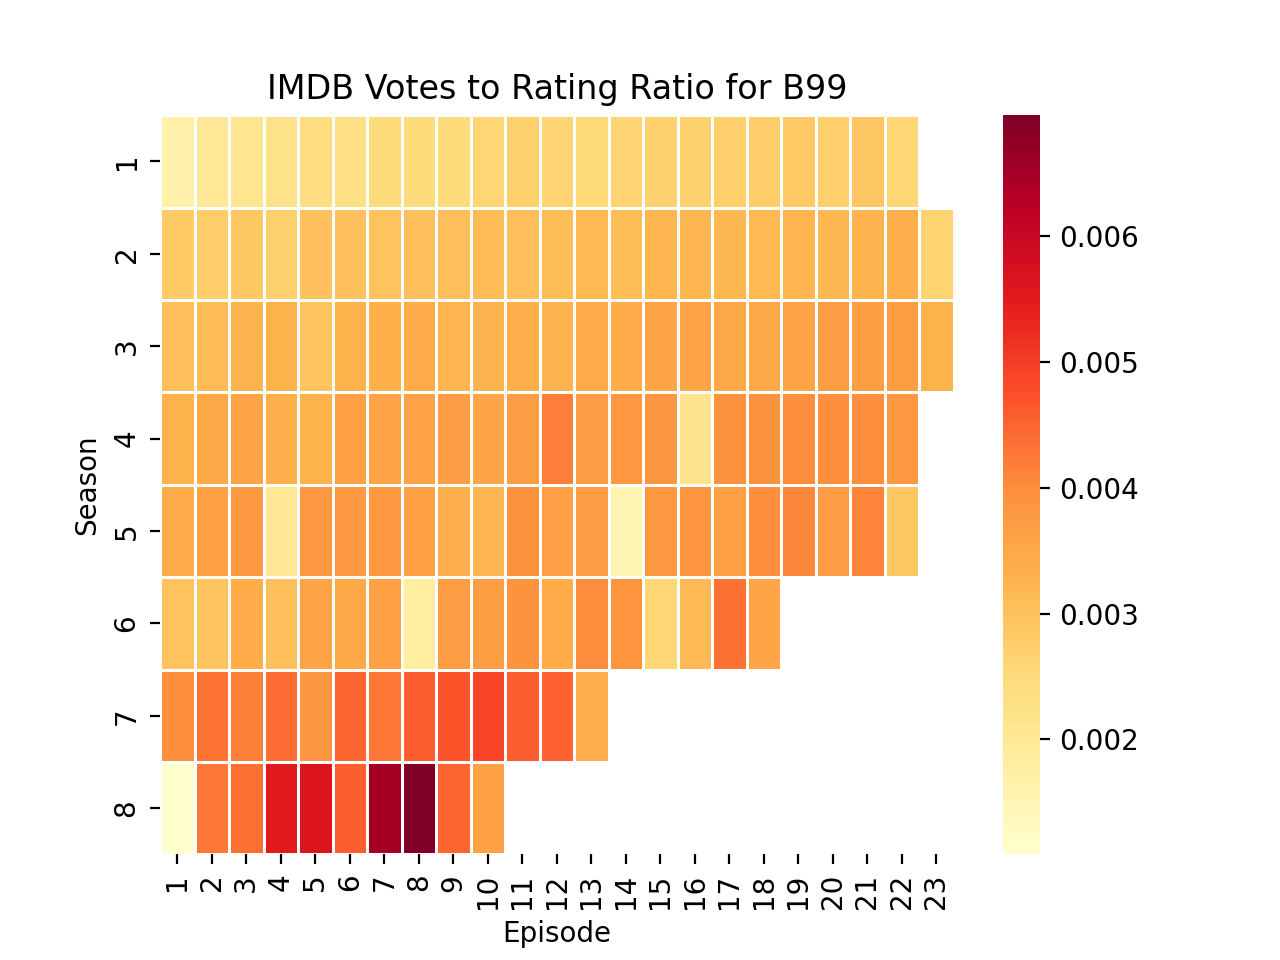

In [ ]:
imdb_data['total_votes'] = pd.to_numeric(imdb_data['total_votes'], errors = 'coerce')

imdb_data['rating_votes_ratio'] = imdb_data['imdb_rating'] / imdb_data['total_votes']
imdb_heatmap2 = imdb_data.pivot_table(index='season', columns='episode_num', values=('rating_votes_ratio'))
imdb2 = sns.heatmap(imdb_heatmap2,fmt=".1f", cmap="YlOrRd", linewidths=0.5)

imdb2.set_title("IMDB Votes to Rating Ratio for B99")
imdb2.set_xlabel("Episode")
imdb2.set_ylabel("Season")

### Highest Ratio

In [ ]:
top_10_ratio = imdb_data.nlargest(10, 'rating_votes_ratio')
print(top_10_ratio[['season', 'episode_num', 'title', 'rating_votes_ratio']])

     season  episode_num            title  rating_votes_ratio
150       8            8          Renewal            0.006961
149       8            7   Game of Boyles            0.006511
147       8            5             PB&J            0.005630
146       8            4        Balancing            0.005485
139       7           10  Admiral Peralta            0.004893
138       7            9          Dillman            0.004700
137       7            8     The Takeback            0.004584
140       7           11     Valloweaster            0.004568
148       8            6       The Set Up            0.004567
141       7           12           Ransom            0.004536


### Lowest Ratio


In [ ]:
top_10_lowest_ratio = imdb_data.nsmallest(10, 'rating_votes_ratio')
print(top_10_lowest_ratio[['season', 'episode_num', 'title', 'rating_votes_ratio']])

     season  episode_num              title  rating_votes_ratio
143       8            1      The Good Ones            0.001085
103       5           14            The Box            0.001542
0         1            1              Pilot            0.001667
119       6            8  He Said, She Said            0.001827
1         1            2         The Tagger            0.001964
93        5            4          HalloVeen            0.002043
2         1            3          The Slump            0.002125
83        4           16            Moo Moo            0.002144
3         1            4          M.E. Time            0.002227
5         1            6          Halloween            0.002266


## Ratings vs Views

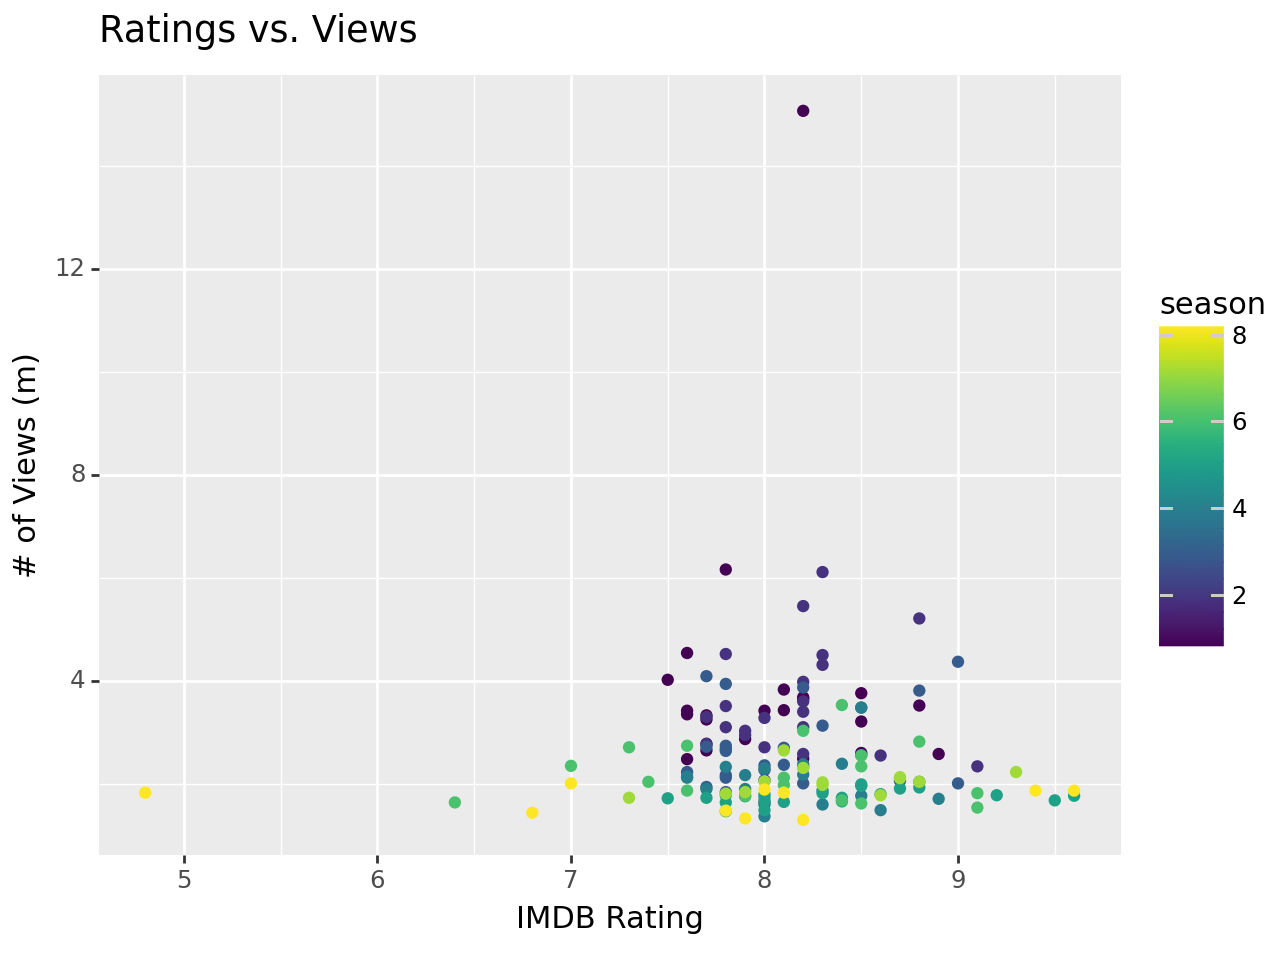

<Figure Size: (640 x 480)>

In [ ]:
from plotnine import ggplot, aes, geom_point, labs, theme, element_text
info = pd.DataFrame(imdb_data['season'])
info["imdb_rating"] = imdb_data['imdb_rating']
info["us_views"] = ep_data['us_viewers']
ggplot(info, aes(x="imdb_rating", y="us_views", group="season", color="season")) + \
    geom_point() + labs(title="Ratings vs. Views", x="IMDB Rating", y="# of Views (m)")


# Viewer Reviews

# Set Up

In [ ]:
# !pip install bs4
# !pip install requests-html
from bs4 import BeautifulSoup
import requests
from requests import TooManyRedirects
import time
from time import sleep
import re
import requests_html
from requests_html import HTMLSession
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
import numpy as np
# !pip install -q transformers
from transformers import pipeline
from plotnine import ggplot, aes, geom_line, theme_minimal,scale_color_manual

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Processing Rotten Tomatoes


In [ ]:
def get_rt_df(url):
  page = requests.get(url)
  session = HTMLSession()
   # Check if the request was successful
  if page.status_code == 200:
      # Parse the HTML content
      soup = BeautifulSoup(page.content, 'html.parser')


      # # Extract user reviews
      reviews = []
      rating = []
      date = []
      if url.find("?type=user")!= -1:
        review_type = "user"
        reviews_text = soup.find_all(class_='audience-reviews__review js-review-text')
        for r in reviews_text:
          reviews.append(r.text.strip())
        # print(reviews)

        reviews_stars = soup.find_all(class_ = "audience-reviews__score")
        for s in reviews_stars:
          count = 0
          whole = s.find_all(class_ = 'star-display__filled')
          count += len(whole)
          half = s.find_all(class_ = 'star-display__half')
          count += len(half)*.5
          rating.append(count)
        dates = soup.find_all(class_ = "audience-reviews__duration")
        for t in dates:
          date.append(t.text)

      else:
        if url.find("?type=top_")!= -1:
          review_type = "top_critic"
        else:
          review_type = "critic"

        reviews_text = soup.find_all(class_='review-text-container')
        for r in reviews_text:
          reviews.append(r.text.strip())
        review_tomatoes = soup.find_all(class_='review-data')
        for t in review_tomatoes:
          tomato = t.find('score-icon-critic-deprecated')
          if tomato['state'] == 'fresh':
            rating.append(5)
          elif tomato['state'] == 'rotten':
            rating.append(0)
          else:
            rating.append(3)
        dates = soup.find_all(class_="review-text-container")
        for t in dates:
          date.append(t.find('span', {'data-qa': 'review-date'}).text)

      data = {'date': date, 'rating': rating, 'review': reviews}
      # print(len(date))
      # print(len(reviews))
      df = pd.DataFrame(data)
      df['review'] = df['review'].str.replace(r'^\n+', '', regex=True)
      season_match = re.search(r'/s(\d+)/', url)
      df['season'] = season_match.group(1)

      df['type'] = review_type
      return df
  else:
      print("Failed to retrieve user reviews. Status code:", page.status_code)
      return None


# Rotten Tomatoes Analysis

In [ ]:
num_seasons = 8
show = "Brooklyn Nine-Nine"
show_code = "brooklyn_nine_nine"

In [ ]:
top_critic_reviews = pd.DataFrame()
user_reviews = pd.DataFrame()
all_critic_reviews = pd.DataFrame()

count = list(range(1,num_seasons + 1))
## ADD SEASON 10 MANUALLY
for i in count:
  temp = get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s0{i}/reviews?type=top_critics")
  top_critic_reviews = pd.concat([top_critic_reviews,temp],ignore_index=True)
  temp2 = get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s0{i}/reviews?type=user")
  user_reviews = pd.concat([user_reviews,temp2],ignore_index=True)
  temp3 = get_rt_df(f"https://www.rottentomatoes.com/tv/{show_code}/s0{i}/reviews")
  all_critic_reviews = pd.concat([all_critic_reviews,temp3],ignore_index=True)


In [ ]:
all_reviews = pd.concat([user_reviews, top_critic_reviews, all_critic_reviews])
all_reviews = all_reviews.sort_values(by='season')

season1 = all_reviews[all_reviews['season'] == '01'].sort_values(by='date')
season2 = all_reviews[all_reviews['season'] == '02'].sort_values(by='date')
season3 = all_reviews[all_reviews['season'] == '03'].sort_values(by='date')
season4 = all_reviews[all_reviews['season'] == '04'].sort_values(by='date')
season5 = all_reviews[all_reviews['season'] == '05'].sort_values(by='date')
season6 = all_reviews[all_reviews['season'] == '06'].sort_values(by='date')
season7 = all_reviews[all_reviews['season'] == '07'].sort_values(by='date')
season8 = all_reviews[all_reviews['season'] == '08'].sort_values(by='date')

all_reviews

,date,rating,review,season,type
0,"Apr 25, 2024",4.0,"Everyone has a role in this show, except for m...",01,user
2,"Jan 9, 2019",5.0,Showcases Samberg's comic talents while reduci...,01,critic
3,"Nov 16, 2018",5.0,The fact that its die-hard fanbase pulled toge...,01,critic
4,"Oct 19, 2018",5.0,"The patter is fast and charming, the quick fla...",01,critic
5,"Oct 19, 2018",5.0,"The jokes are clever, and the cast works toget...",01,critic
...,...,...,...,...,...
143,"Feb 8, 2024",4.0,Y pensar que casi cancelan esta joya. Son de e...,08,user
142,"Feb 18, 2024",2.0,Definitely a creative drain was already notice...,08,user
141,"Mar 27, 2024",5.0,Love this show! This season navigated ongoing ...,08,user
73,"Aug 12, 2021",5.0,"""Nine-Nine"" goes out on a semi-serious note, a...",08,top_critic


In [ ]:
tc_avg = top_critic_reviews['rating'].mean()*2
ur_avg = user_reviews['rating'].mean()*2
ac_avg = all_critic_reviews['rating'].mean()*2

s1_avg = season1['rating'].mean()*2
s2_avg = season2['rating'].mean()*2
s3_avg = season3['rating'].mean()*2
s4_avg = season4['rating'].mean()*2
s5_avg = season5['rating'].mean()*2
s6_avg = season6['rating'].mean()*2
s7_avg = season7['rating'].mean()*2
s8_avg = season8['rating'].mean()*2

averages_rt = [s1_avg,s2_avg,s3_avg,s4_avg,s5_avg,s6_avg,s7_avg,s8_avg]

## Rotten Tomatoes vs IMDB Ratings

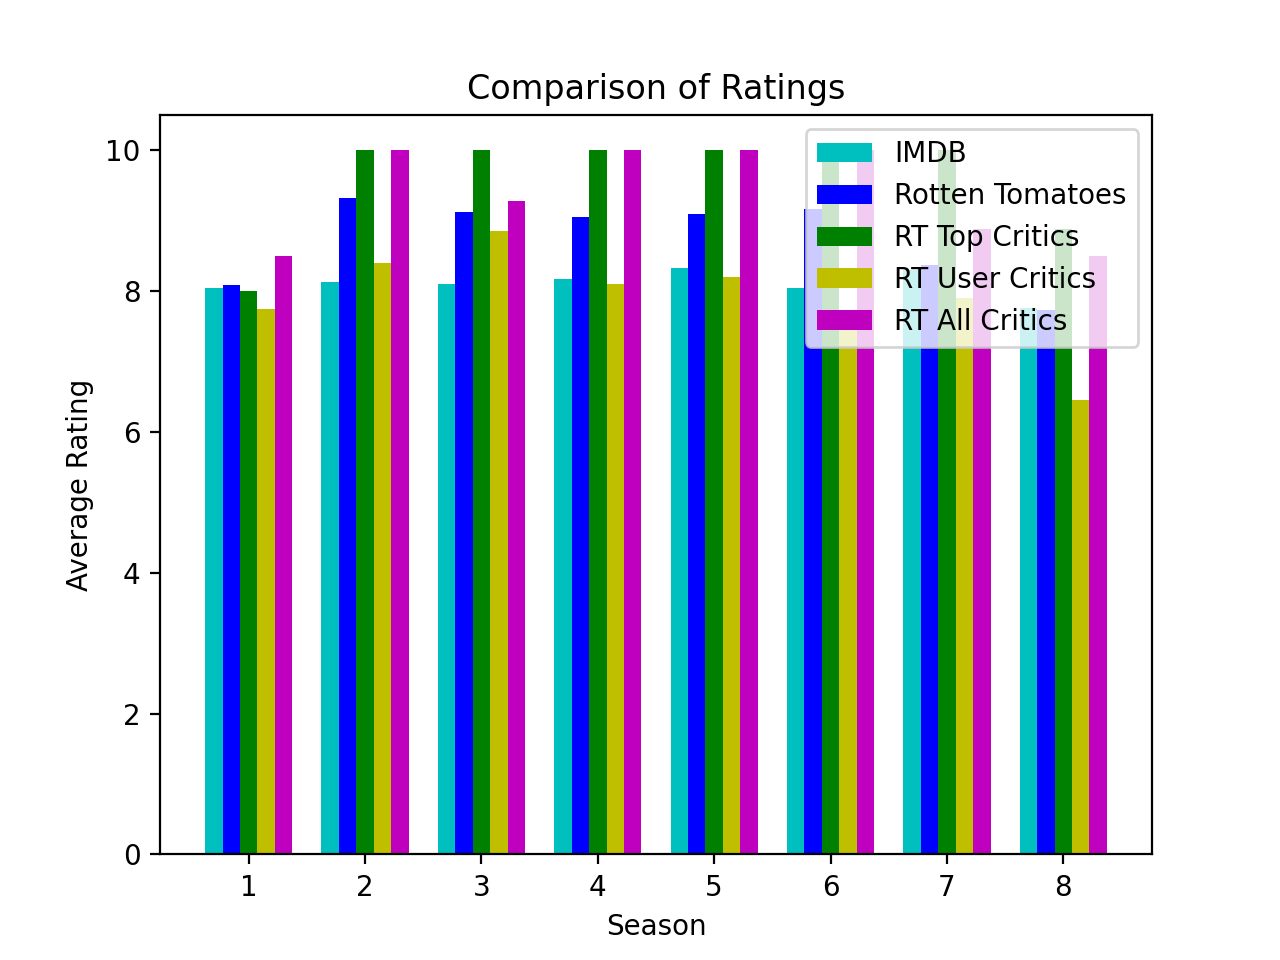

In [ ]:
# Calculate mean ratings for each source and season
imdb_season_ratings = [imdb_data[imdb_data['season'] == i]['imdb_rating'].mean() for i in count]
tc_season = [top_critic_reviews[top_critic_reviews['season'] == f'0{i}']['rating'].mean() * 2 for i in count]
user_season = [user_reviews[user_reviews['season'] == f'0{i}']['rating'].mean() * 2 for i in count]
ac_season = [all_critic_reviews[all_critic_reviews['season'] == f'0{i}']['rating'].mean() * 2 for i in count]

# Define the width of each bar group
bar_width = 0.15

# Calculate the x-coordinates for each group of bars
x_imdb = [i - 0.3 for i in count]
x_rt = [i - 0.15 for i in count]
x_tc = [i for i in count]
x_user = [i + 0.15 for i in count]
x_ac = [i + 0.3 for i in count]

# Create the figure and axes
fig, rt_vs_imdb = plt.subplots()

# Plot the bars for each source and season
rt_vs_imdb.bar(x_imdb, imdb_season_ratings, width=bar_width, color='c', align='center', label='IMDB')
rt_vs_imdb.bar(x_rt, averages_rt, width=bar_width, color='b', align='center', label='Rotten Tomatoes')
rt_vs_imdb.bar(x_tc, tc_season, width=bar_width, color='g', align='center', label='Top Critic')
rt_vs_imdb.bar(x_user, user_season, width=bar_width, color='y', align='center', label='User')
rt_vs_imdb.bar(x_ac, ac_season, width=bar_width, color='m', align='center', label='All Critic')

# Set labels and legend
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title("Comparison of Ratings")
plt.legend(['IMDB', 'Rotten Tomatoes', 'RT Top Critics', 'RT User Critics', 'RT All Critics'])
plt.show()

## Viewer Score Density Plot

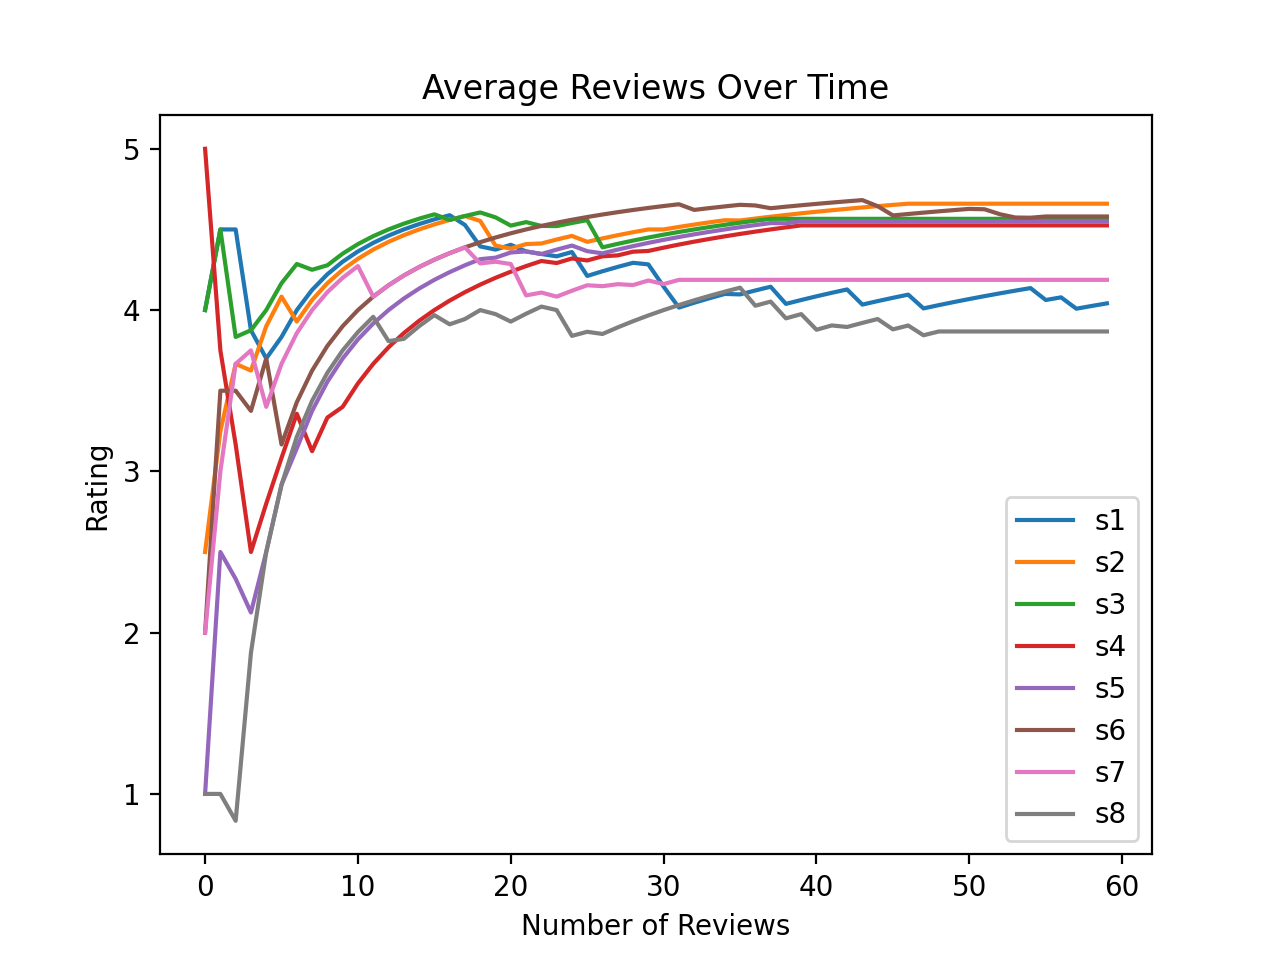

In [ ]:

## CHANGE NEEDED FOR DIFF SEASONS -- season_ratings
season_ratings = {
    'ratings': [season1['rating'], season2['rating'], season3['rating'], season4['rating'], season5['rating'], season6['rating'], season7['rating'], season8['rating']],
    'season': ["s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8"]
}
# season_ratings = pd.DataFrame(data).reset_index()

x_values = list(range(1,len(season_ratings['ratings'][0])+1))

# Create an empty ggplot object
p = ggplot() + theme_minimal()

count2 = list(range(num_seasons))
for i in count2:
  mean = season_ratings['ratings'][i].mean()
  padded_ratings = np.pad(season_ratings['ratings'][i], (0, 60 - len(season_ratings['ratings'][i])), mode='constant', constant_values=np.nan)
  season_ratings['ratings'][i] = np.where(np.isnan(padded_ratings), mean, padded_ratings)

data = pd.DataFrame()
count3 = list(range(60))
for i in count2:
  temp = []
  avg_temp = []
  for j in count3:
    temp.append(season_ratings['ratings'][i][j])
    avg_temp.append(sum(temp)/len(temp))
  data[i] = avg_temp

data

# Plot each column as a separate line
for column in data.columns:
  plt.plot(data.index, data[column], label=column)

plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.title('Average Reviews Over Time')
labels=[f"s{i}" for i in count]
plt.legend(labels)


## Word Cloud

full,review,season,show,brooklyn,original,score,ninenine,2019,jan,sep,episodes,funny,good,seasons,one,characters,comedy,series,great,really,still,like,best,samberg,shows,new,2013,episode,10,2021,oct,holt,andy,b,character,5,cast,well,45,jake,last,love,even,11,better,12,9,first,always,feb,2014,way,make,jokes,fun,dont,humor,lot,moments,however,amy,ensemble,7,much,feels,braugher,end,time,2,mar,humour,final,thats,enough,say,hilarious,2020,17,see,watch,2015,yet,finale,nbc,sitcom,ninenines,things,captain,ever,cant,im,would,29,also,people,feel,8,police,many,precinct,get,fantastic,perfect,back,may,little,isnt,doesnt,every,least,often,99,two,1,3,social,nine,without,aug,together,2018,whole,schur,goor,writing,though,amazing,chemistry,know,memorable,mostly,–,4,previous,28,2016,20,gina,cop,far,21,dan,peralta,18,andre,loved,going,interesting,tv,everything,another,world,felt,raymond,real,quick,strong,never,parks,recreation,snl,work,comedies,forced,made,laugh,story,makes,watching,thanks,premise,incredi

Text(0.5, 1.0, 'Brooklyn Nine-Nine \nSeason 1-8 Reviews Word Cloud')

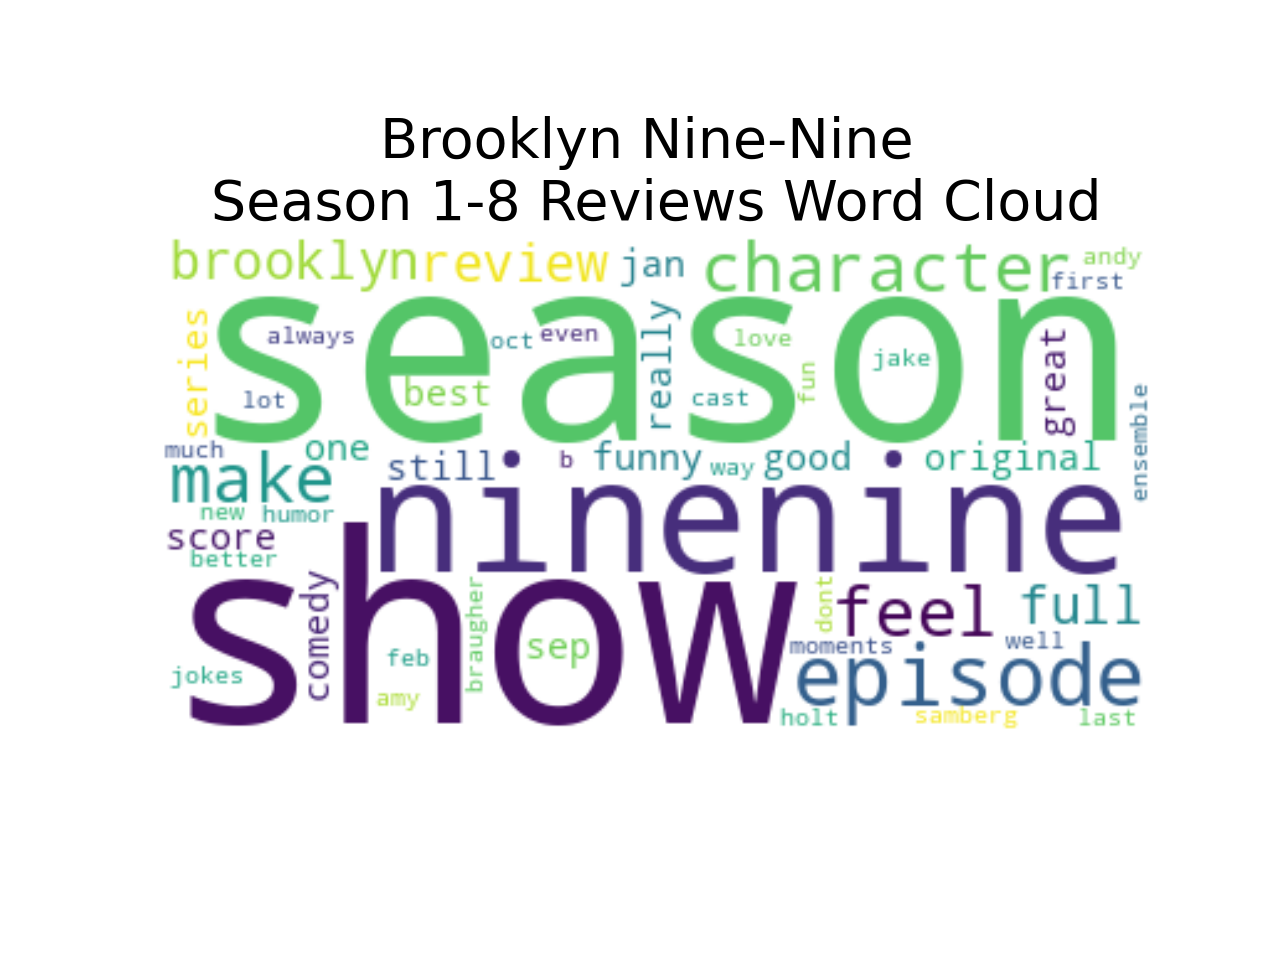

In [ ]:
stop_words = set(stopwords.words('english'))
all_text = ' '.join(all_reviews['review']).lower()
cleaned_text = ''.join(char for char in all_text if char not in string.punctuation)
words = word_tokenize(cleaned_text)
filtered_words = [word for word in words if word.lower() not in stop_words]
word_counts = Counter(filtered_words)
top_words = dict(word_counts.most_common(200))
top_words_clean = ','.join([word for word in top_words.keys()])
print(top_words_clean)
wordcloud = WordCloud(background_color='white', max_words=50).generate(top_words_clean)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(f"{show} \nSeason 1-{num_seasons} Reviews Word Cloud", fontsize=20)


### Top Words by Season


In [ ]:
other_dict = []

for i in count:
  s1 = all_reviews[all_reviews['season'] == f'0{i}']
  all_text = ' '.join(s1['review']).lower()
  cleaned_text = ''.join(char for char in all_text if char not in string.punctuation)
  words = word_tokenize(cleaned_text)
  filtered_words = [word for word in words if word.lower() not in stop_words]
  word_counts = Counter(filtered_words)
  all_words = dict(word_counts)
  sorted_dict = dict(sorted(all_words.items(), key=lambda item: item[1], reverse=True))
  other_dict.append(sorted_dict)

num_words = pd.DataFrame()
tw = dict(list(top_words.items())[:20])
c = 0
for i in other_dict:
  # print(word1)
  c += 1
  # print("NEW DICT ", count )
  counts_arr = []
  for word1, count1 in tw.items():
    # print(word1)
    added = False
    for word2, count2 in i.items():
      if word1 == word2:
        added = True
        counts_arr.append(count2)
    if(added == False):
      counts_arr.append(0)
  # print(counts_arr)
  num_words[f'Season {c}'] = counts_arr

num_words
# print([word for word in top_words if word.lower() not in stop_words])

,Season 1,Season 2,Season 3,Season 4,Season 5,Season 6,Season 7,Season 8
0,40,28,19,20,20,36,12,30
1,40,27,18,20,20,38,12,29
2,5,22,21,23,23,24,38,25
3,18,12,13,16,24,17,11,22
4,18,15,8,9,9,21,12,12
5,10,11,9,11,5,13,5,14
6,10,11,9,11,5,13,5,14
7,14,10,7,9,6,13,6,12
8,4,9,5,11,8,36,0,0
9,5,9,5,10,9,22,0,1


Text(0, 0.5, 'Words Count')

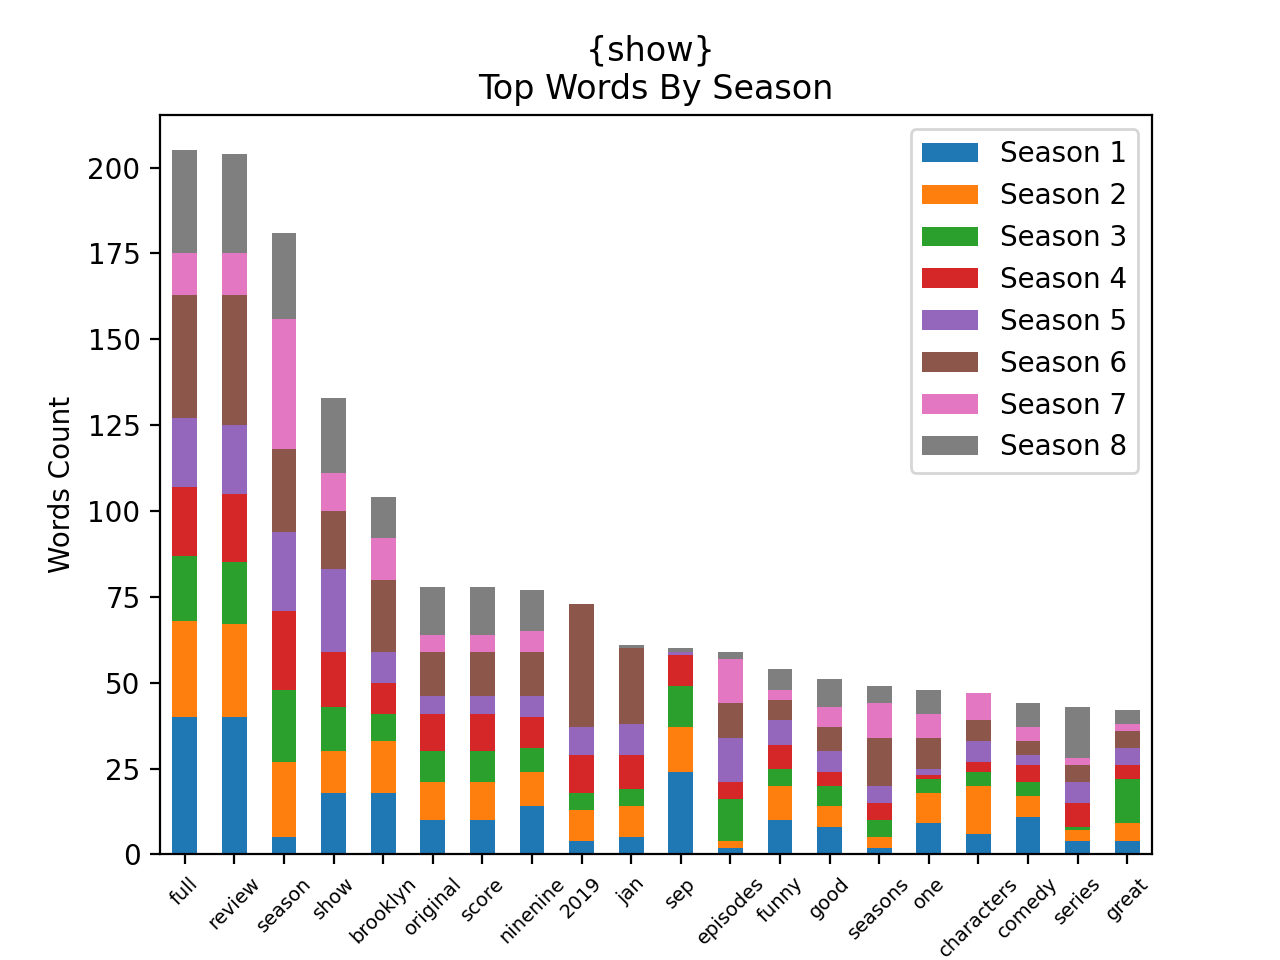

In [ ]:
num_words['words'] = list(top_words.keys())[:20]
num_words.set_index('words')

ax = num_words.plot(kind="bar", stacked = True)
ax.set_xticklabels(num_words['words'], rotation = 45, size = 7)
plt.title("{show} \nTop Words By Season")
plt.xlabel("Word")
plt.ylabel("Words Count")


# Sentiment Analysis

## Sentiment for each season

In [ ]:
sentiment_pipeline = pipeline("sentiment-analysis")
sentiment = sentiment_pipeline(list(all_reviews['review']))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
sent = [item['label'] for item in sentiment]
scores = [item['score'] for item in sentiment]
# len(sent)

all_reviews['sentiment'] = sent
all_reviews['sentiment_score'] = scores
all_reviews

,date,rating,review,season,type,sentiment,sentiment_score
0,"Apr 25, 2024",4.0,"Everyone has a role in this show, except for m...",01,user,POSITIVE,0.998577
2,"Jan 9, 2019",5.0,Showcases Samberg's comic talents while reduci...,01,critic,POSITIVE,0.999237
3,"Nov 16, 2018",5.0,The fact that its die-hard fanbase pulled toge...,01,critic,POSITIVE,0.998441
4,"Oct 19, 2018",5.0,"The patter is fast and charming, the quick fla...",01,critic,POSITIVE,0.999831
5,"Oct 19, 2018",5.0,"The jokes are clever, and the cast works toget...",01,critic,POSITIVE,0.999822
...,...,...,...,...,...,...,...
143,"Feb 8, 2024",4.0,Y pensar que casi cancelan esta joya. Son de e...,08,user,NEGATIVE,0.966593
142,"Feb 18, 2024",2.0,Definitely a creative drain was already notice...,08,user,POSITIVE,0.997278
141,"Mar 27, 2024",5.0,Love this show! This season navigated ongoing ...,08,user,POSITIVE,0.999851
73,"Aug 12, 2021",5.0,"""Nine-Nine"" goes out on a semi-serious note, a...",08,top_critic,POSITIVE,0.999538


Creating a Sentiment Scale:

(weighted sentiments)

If sentiment Positive, value = 1*sentiment_score

If sentiment Negative, value = -1*sentiment_score

(ratings normalized)

If Rating = 5, value = 1

If Rating = 4, value = .5

If Rating = 3, value = 0

If Rating = 2, value = -.5

If Rating = 1, value = -1

The final value is the average of these values.

In [ ]:
# Define a function to calculate the final value for each row
def calculate_final_sent(row):
    sentiment_score = row['sentiment_score']

    p5 = str(row['rating']).endswith('.5')
    rating = round(row['rating'])
    sentiment = row['sentiment']

    # Calculate weighted sentiment score
    if sentiment == 'POSITIVE':
        weighted_sentiment = sentiment_score
    elif sentiment == 'NEGATIVE':
        weighted_sentiment = -1 * sentiment_score
    else:
        weighted_sentiment = 0  # Neutral sentiment

    # Normalize rating
    if rating == 5:
        normalized_rating = 1
    elif rating == 4:
        normalized_rating = 0.5
    elif rating == 3:
        normalized_rating = 0
    elif rating == 2:
        normalized_rating = -0.5
    elif rating == 1:
        normalized_rating = -1
    else:
        normalized_rating = 0

    if p5:
      normalized_rating + .25

    # Calculate the final value
    final_value = (weighted_sentiment + normalized_rating) / 2

    return final_value

# Apply the function to each row in the DataFrame
all_reviews['review_sentiment'] = all_reviews.apply(calculate_final_sent, axis=1)

# Calculate the average final value
average_final_value = all_reviews['review_sentiment'].mean()

# Print the average final value
print("Average final value:", average_final_value)


Average final value: 0.6492900158489606


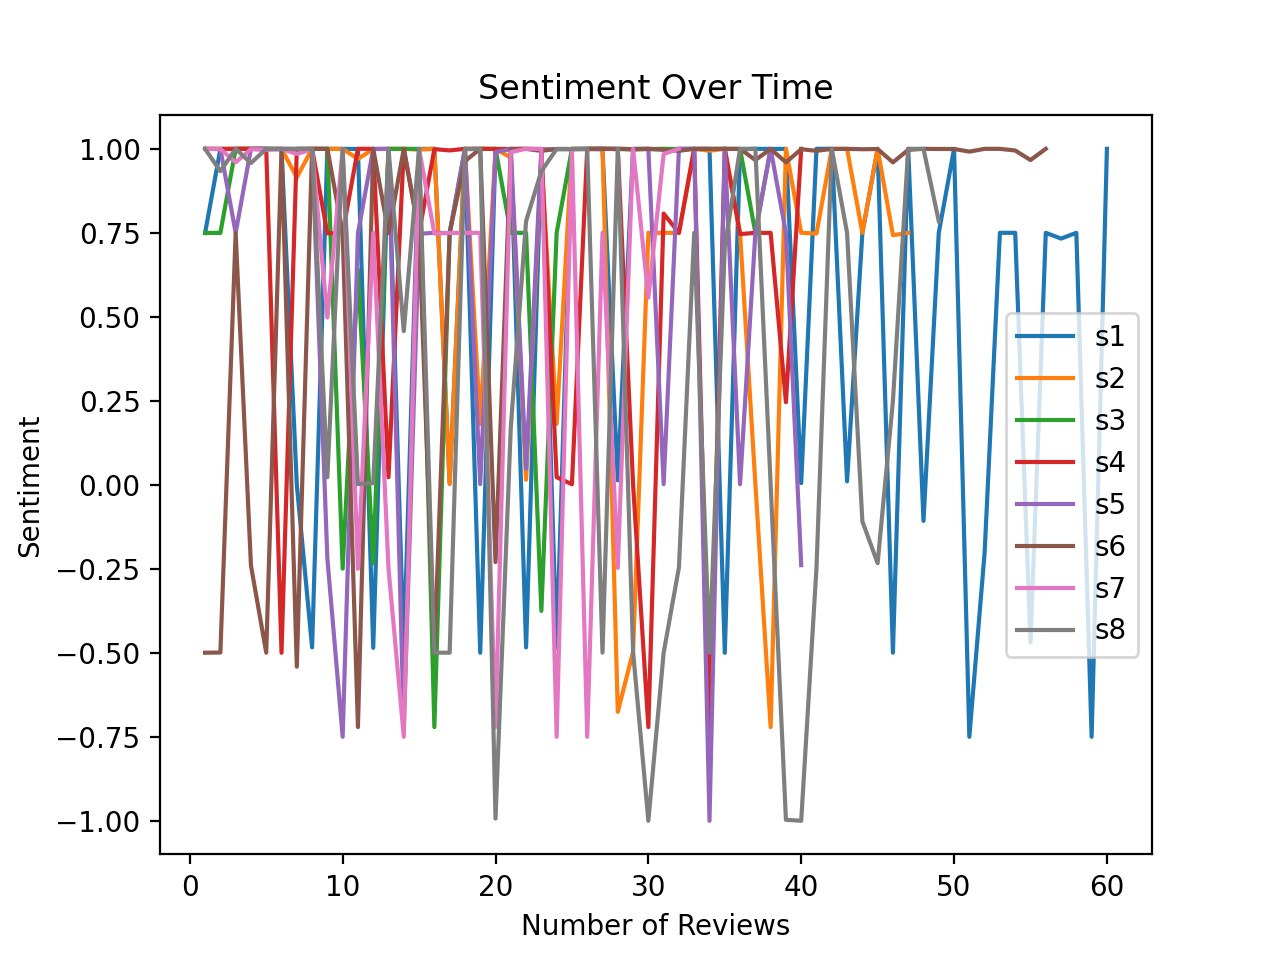

In [ ]:
for i in count:
  dset = all_reviews[all_reviews['season']==f'0{i}']
  x_vals = list(range(1, len(dset)+1))
  plt.plot(x_vals, dset['review_sentiment'])


plt.xlabel('Number of Reviews')
plt.ylabel('Sentiment')
plt.title('Sentiment Over Time')
labels=[f"s{i}" for i in count]
plt.legend(labels)

Text(0.5, 1.0, 'Average Sentiment Through Seasons')

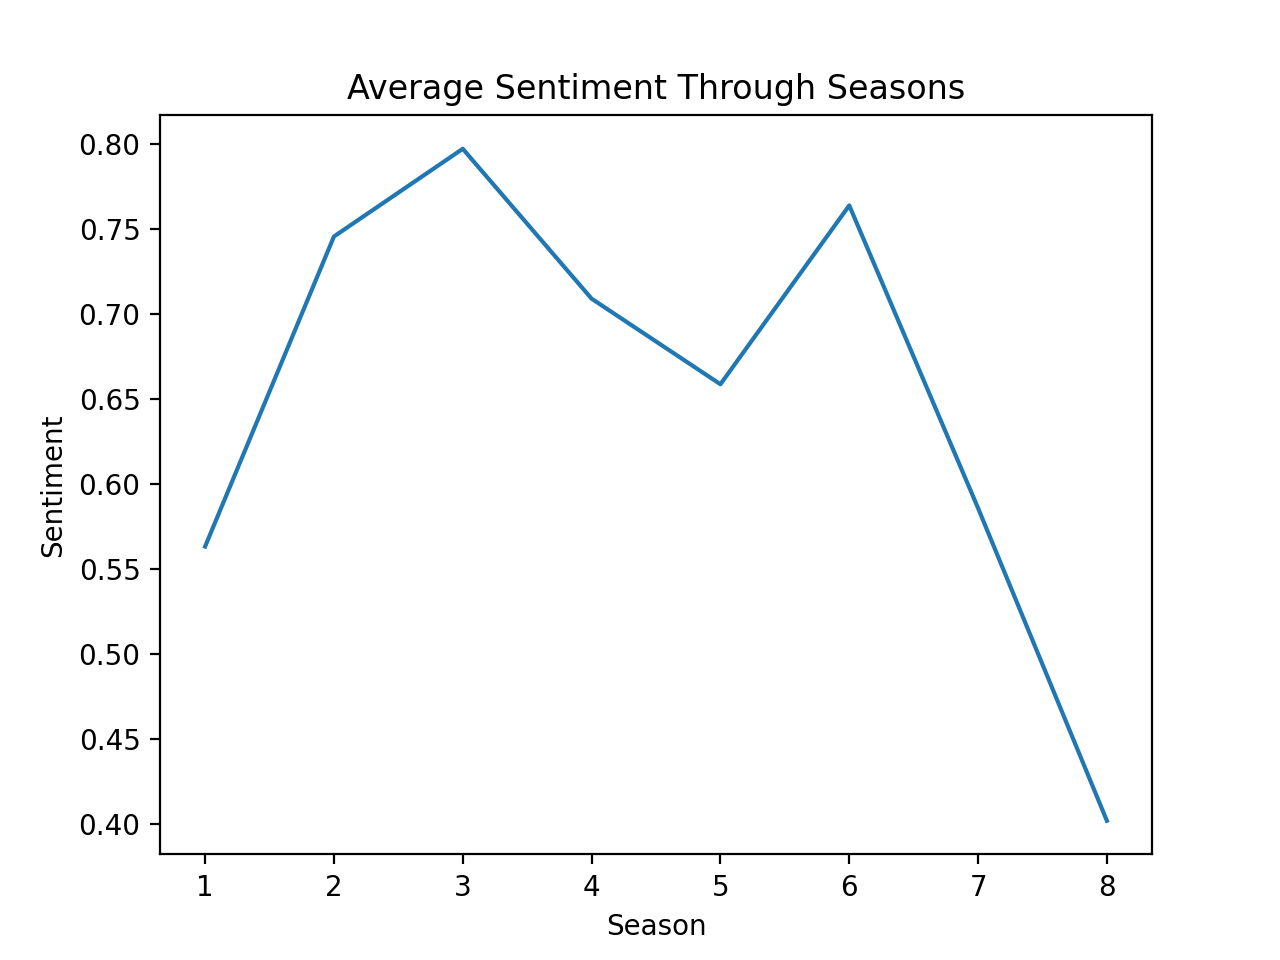

In [ ]:
dset = []
for i in count:
  dset.append(all_reviews[all_reviews['season']==f'0{i}']['review_sentiment'].mean())
x_vals = list(range(1,9))
plt.plot(x_vals, dset)


plt.xlabel('Season')
plt.ylabel('Sentiment')
plt.title('Average Sentiment Through Seasons')

## Most Positive/Negative Words Used

In [ ]:
all_words = dict(word_counts)
all_words_sent = sentiment_pipeline(list(all_words.keys()))

In [ ]:
word_sent = pd.DataFrame(all_words_sent)
word_sent["word"] = list(all_words.keys())
word_sent["word_count"] = list(all_words.values())
word_sent

,label,score,word,word_count
0,POSITIVE,0.999439,provides,1
1,POSITIVE,0.992546,parade,1
2,POSITIVE,0.999638,comedy,7
3,POSITIVE,0.990155,also,3
4,POSITIVE,0.994564,leaning,1
...,...,...,...,...
540,NEGATIVE,0.914409,semiserious,1
541,POSITIVE,0.986113,note,1
542,POSITIVE,0.994967,part,1
543,POSITIVE,0.999806,effectively,1


In [ ]:
word_sent = word_sent.sort_values(by='score', ascending=False)
neutral_df = word_sent[word_sent['label'] == 'NEUTRAL'].copy()
positive_df = word_sent[word_sent['label'] == 'POSITIVE'].copy()
negative_df = word_sent[word_sent['label'] == 'NEGATIVE'].copy()
positive_df

,label,score,word,word_count
55,POSITIVE,0.999881,loved,2
502,POSITIVE,0.999879,hilarious,1
490,POSITIVE,0.999879,entertaining,1
82,POSITIVE,0.999877,wonderful,2
175,POSITIVE,0.999876,warmhearted,2
...,...,...,...,...
207,POSITIVE,0.685333,ends,1
473,POSITIVE,0.674691,middle,1
297,POSITIVE,0.672265,though,3
360,POSITIVE,0.646030,não,2


In [ ]:
top_10_positive_words = positive_df.head(10)
top_10_positive_words

,label,score,word,word_count
55,POSITIVE,0.999881,loved,2
502,POSITIVE,0.999879,hilarious,1
490,POSITIVE,0.999879,entertaining,1
82,POSITIVE,0.999877,wonderful,2
175,POSITIVE,0.999876,warmhearted,2
155,POSITIVE,0.999876,fun,2
95,POSITIVE,0.999874,grace,1
241,POSITIVE,0.999874,love,8
495,POSITIVE,0.999871,real,1
109,POSITIVE,0.999871,rewarding,1


In [ ]:
top_10_negative_words = negative_df.head(10)
top_10_negative_words

,label,score,word,word_count
312,NEGATIVE,0.999802,worst,1
317,NEGATIVE,0.999801,garbage,1
435,NEGATIVE,0.999796,unnecessary,1
313,NEGATIVE,0.999795,awful,2
143,NEGATIVE,0.999793,falters,1
459,NEGATIVE,0.999788,disappointing,1
447,NEGATIVE,0.999784,sadly,1
481,NEGATIVE,0.999784,disappointed,1
308,NEGATIVE,0.999782,bad,2
387,NEGATIVE,0.999781,obnoxiously,1


In [ ]:
word_sent = word_sent.sort_values(by='word_count', ascending=False)
neutral_df = word_sent[word_sent['label'] == 'NEUTRAL'].copy()
positive_df = word_sent[word_sent['label'] == 'POSITIVE'].copy()
negative_df = word_sent[word_sent['label'] == 'NEGATIVE'].copy()

Text(0, 0.5, 'Words Count')

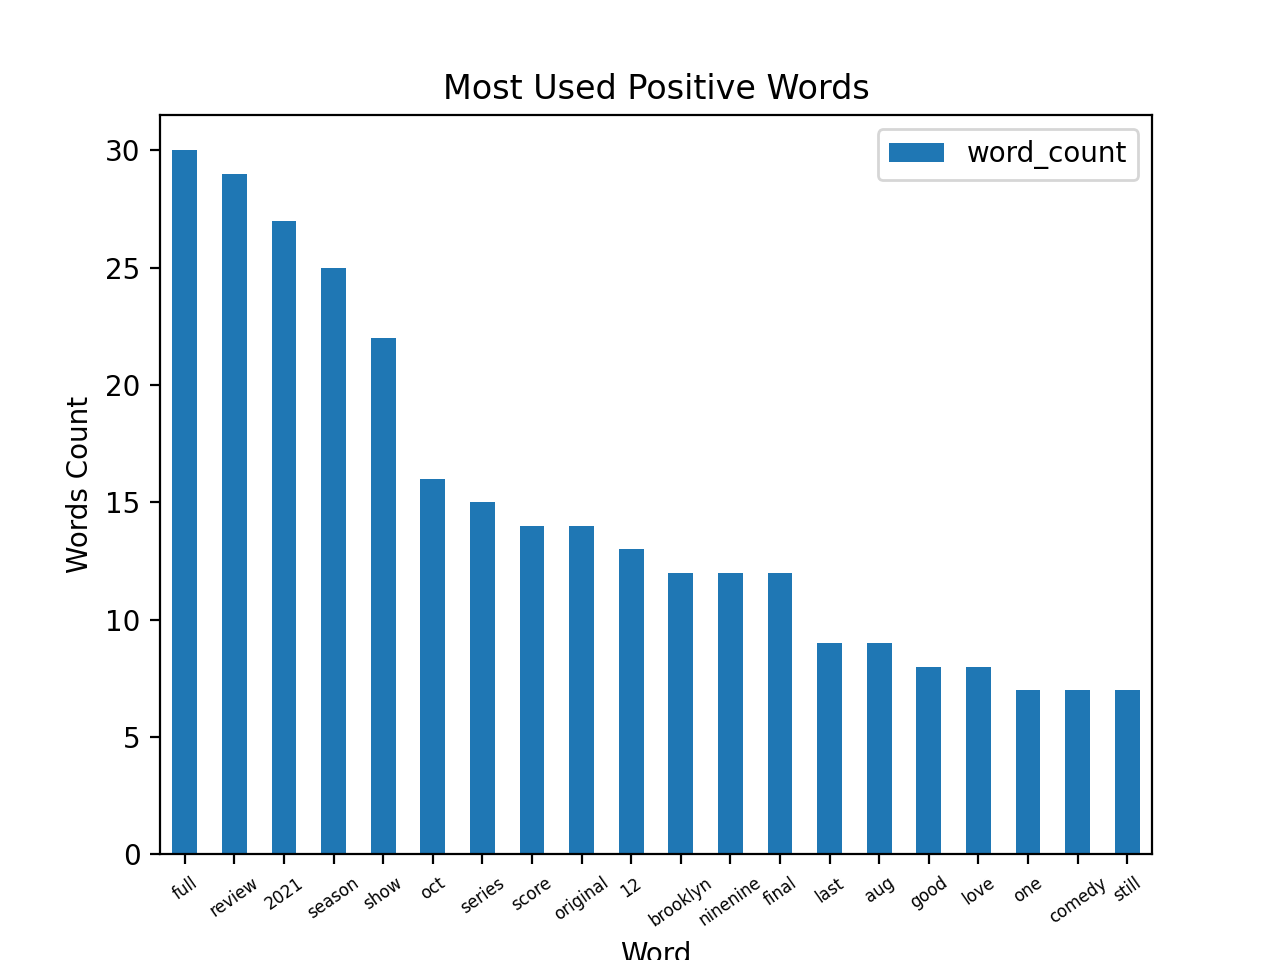

In [ ]:
temp = pd.DataFrame(positive_df['word'])
temp["word_count"] = positive_df['word_count']
temp = temp.head(20)
ax = temp.plot(kind = 'bar')
ax.set_xticklabels(positive_df['word'].head(20), rotation = 35, size = 6)
plt.title("Most Used Positive Words")
plt.xlabel("Word")
plt.ylabel("Words Count")

Text(0, 0.5, 'Words Count')

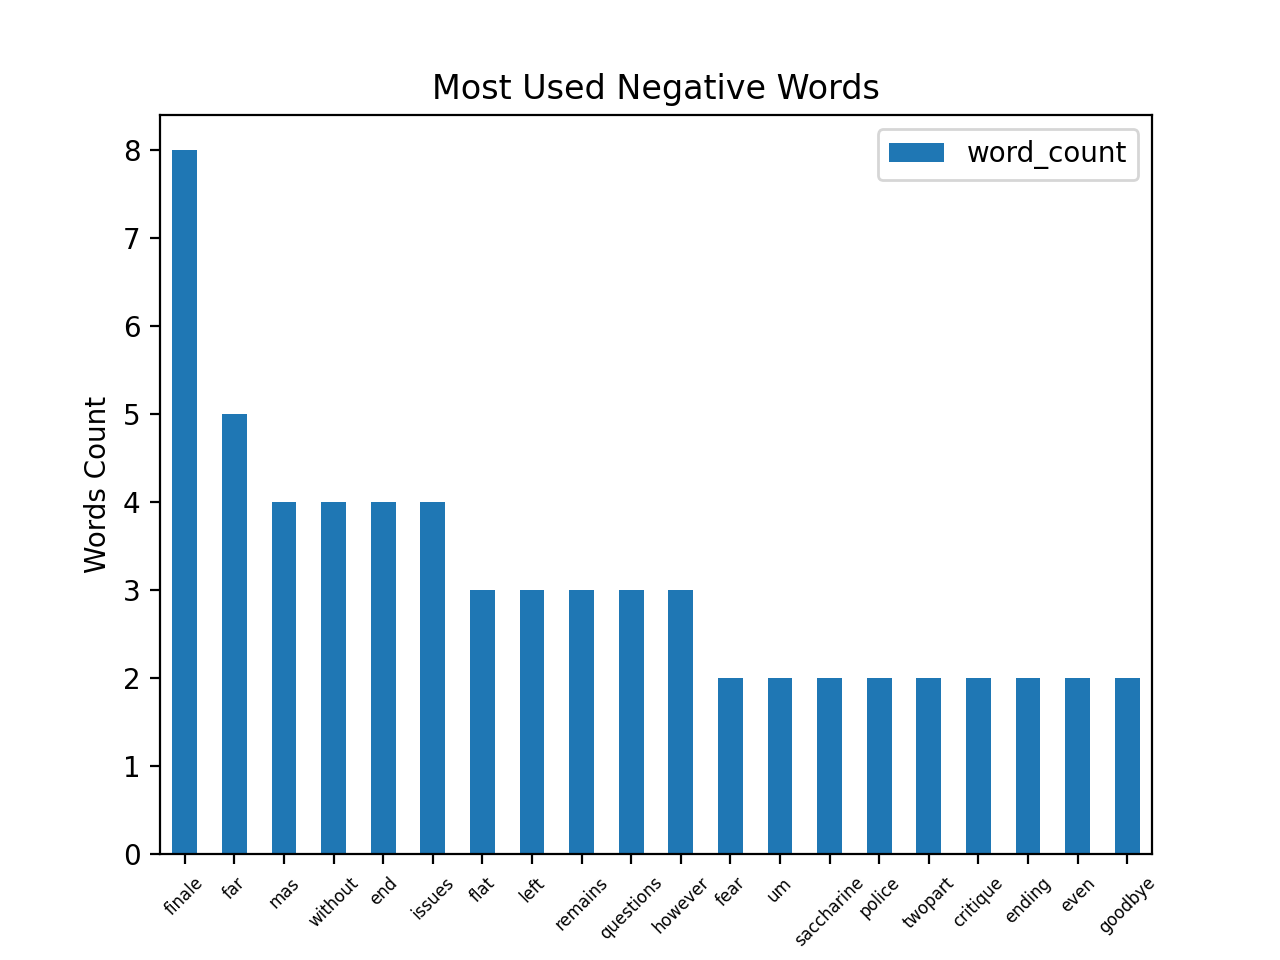

In [ ]:
temp = pd.DataFrame(negative_df['word'])
temp["word_count"] = negative_df['word_count']
temp = temp.head(20)
ax =temp.plot(kind = 'bar')
ax.set_xticklabels(negative_df['word'].head(20), rotation = 45, size = 6)
plt.title("Most Used Negative Words")
plt.xlabel("Word")
plt.ylabel("Words Count")